# Computer Vision Contours

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Contours

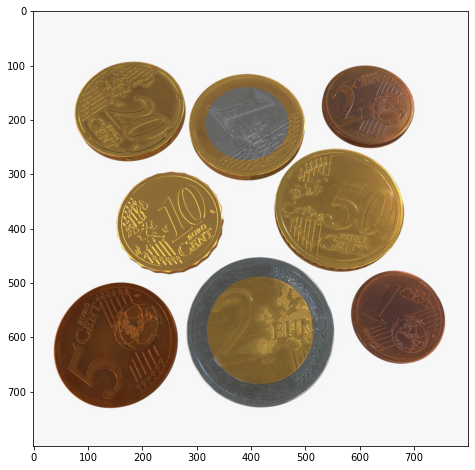

In [2]:
# Have a look at the image below
color_coins = cv2.imread('img/coins5.jpg', cv2.IMREAD_COLOR)
rgb_coins = cv2.cvtColor(color_coins,cv2.COLOR_BGR2RGB)

plt.figure(figsize = (12,8))
plt.imshow(rgb_coins);

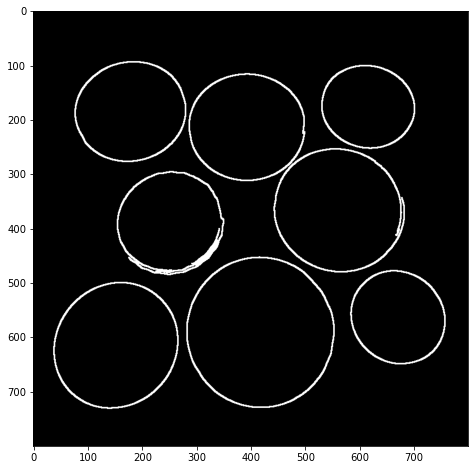

In [93]:
# Convert the image above to grayscale
gray = cv2.cvtColor(rgb_coins, cv2.COLOR_RGB2GRAY)


# Apply some gaussian blur to it (try differente size kernels)
gray_blur = cv2.GaussianBlur(gray, (7,7), 0, 0)


# Apply Canny to find edges and display the image 

gray_canny = cv2.Canny(gray_blur, 0, 255)
kern = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
gray_canny = cv2.dilate(gray_canny, kern)
plt.figure(figsize = (12,8))
plt.imshow(gray_canny, cmap='gray')

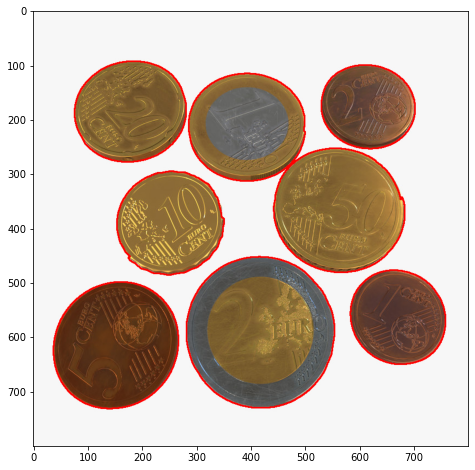

In [95]:
# Now find the contours on the image where you applied canny as well as in the grayscale image
# Draw the contours on the images (or better yet on copies of the images)
# Display the images, how does it look like?

canny_contours, canny_hierarchy = cv2.findContours(gray_canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
org_contours, org_hierarchy = cv2.findContours(gray_blur, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

canv = rgb_coins.copy()
cv2.drawContours(canv, canny_contours, -1, (255, 0, 0), 2)
plt.figure(figsize = (12,8))
plt.imshow(canv);

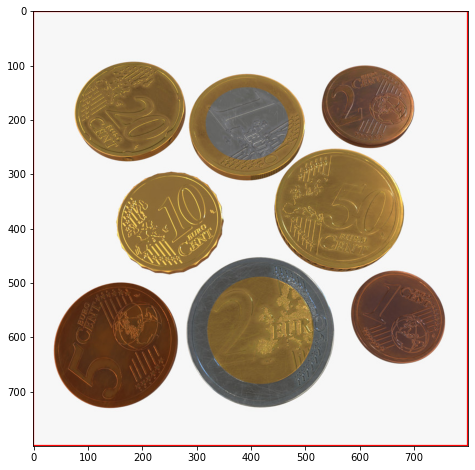

In [47]:
canv = rgb_coins.copy()
cv2.drawContours(canv, org_contours, -1, (255, 0, 0), 2)
plt.figure(figsize = (12,8))
plt.imshow(canv);

[Hint](# "You will need to use cv2.findContours and cv2.drawContours") 

In [32]:
# print the number of contours that has been found
print(canny_hierarchy)
len(canny_contours)

[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [-1  6 -1 -1]]]


8

In [29]:
len(org_contours)


1

[Hint](# "Simply use the built it python len funtion -> len(coins_contours)") 

## Sorting Contours

### By area

In [33]:
def get_contour_areas(contours):
    all_areas = []
    for contour in contours:
        contour_area = cv2.contourArea(contour)
        all_areas.append(contour_area)
    return all_areas

In [34]:
# We can sort contours with any function, a really useful way of sorting is by area, in many situations we might
# only want to find the biggest or smallest contours, I'm providing the function I use to get all contour areas
# This function is useful to be able to see at a glance all contours areas and get a sense of what is the biggest 
# And which one is the smallest one, however we will not use this to sort them we can just pass cv2.contourArea 
# To the function that is going to be sorting it later
# Call get_contour_areas an pass in the list of contours you got with openCV and then store the results in a var
cas = get_contour_areas(canny_contours)

In [35]:
# Print the contour areas to screen
cas

[41163.5, 23118.5, 58477.5, 160.5, 184.5, 162.0, 20331.5, 29250.5]

In [96]:
# Now sort the areas by biggest to smallest and print the sorted areas
sorted_cas = sorted(canny_contours, key=cv2.contourArea, reverse = True)
sorted_cas

[array([[[415, 451]],
 
        [[414, 452]],
 
        [[400, 452]],
 
        [[399, 453]],
 
        [[393, 453]],
 
        [[392, 454]],
 
        [[388, 454]],
 
        [[387, 455]],
 
        [[384, 455]],
 
        [[383, 456]],
 
        [[380, 456]],
 
        [[379, 457]],
 
        [[377, 457]],
 
        [[376, 458]],
 
        [[374, 458]],
 
        [[373, 459]],
 
        [[371, 459]],
 
        [[370, 460]],
 
        [[368, 460]],
 
        [[367, 461]],
 
        [[365, 461]],
 
        [[364, 462]],
 
        [[363, 462]],
 
        [[362, 463]],
 
        [[360, 463]],
 
        [[359, 464]],
 
        [[358, 464]],
 
        [[357, 465]],
 
        [[356, 465]],
 
        [[355, 466]],
 
        [[354, 466]],
 
        [[353, 467]],
 
        [[352, 467]],
 
        [[351, 468]],
 
        [[350, 468]],
 
        [[348, 470]],
 
        [[347, 470]],
 
        [[346, 471]],
 
        [[345, 471]],
 
        [[343, 473]],
 
        [[342, 473]],
 
        [[339, 4

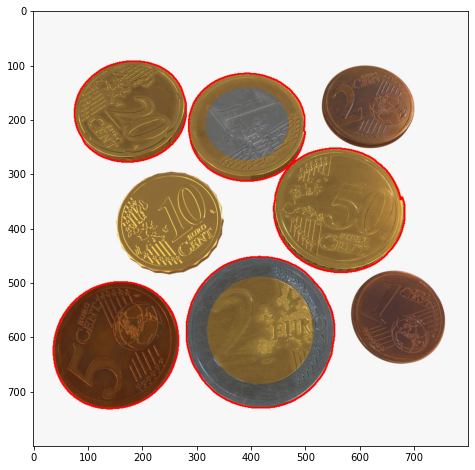

In [97]:
canv = rgb_coins.copy()
c = sorted_cas[:5]
cv2.drawContours(canv, c, -1, (255, 0, 0), 2)
plt.figure(figsize = (12,8))
plt.imshow(canv);

In [ ]:
# Repeat the same with your own images, practice sorting contours and think of how it can be useful
# You might need to sort them by something else, just be creative!


### By X coordinate (left to right)

In [49]:
def get_contour_x_center_coordinate(contours):    
    if cv2.contourArea(contours) > 10:
        M = cv2.moments(contours)
        return(int(M['m10']/M['m00']))

[OpenCV Moments](https://www.learnopencv.com/find-center-of-blob-centroid-using-opencv-cpp-python/)

In [52]:
# This is an useful function you can use when you need to sort contours left to right
# Sort the contours this time left to right
sort_lr = sorted(canny_contours, key = get_contour_x_center_coordinate, reverse = True)

In [54]:
# Draw the contours one at a time and display the images on screen 
cv2.namedWindow('preview')
canv = rgb_coins.copy()
for i in sort_lr:
    cv2.drawContours(canv, [i], -1, (255,0,0), 2)
    cv2.imshow('preview', canv)
    cv2.waitKey(0)

cv2.destroyAllWindows()
cv2.waitKey(1)

-1

[Hint](# "You can just extract the one contour at a time from the list and pass it in to drawContours as a new list that contains that only one contour, you can use a for loop to iterate the contours") 

In [98]:
# Can you think of other ways to sort contours?
cv2.moments(canny_contours)

TypeError: Expected Ptr<cv::UMat> for argument 'array'